In [39]:
import pandas as pd
import matplotlib.pyplot as plt

## Load MinWage variable

In [40]:
data = pd.read_csv("./minimum wage.csv") 
data['Effective Date'] = pd.to_datetime(data['Effective Date'], format='%d-%b-%y')
data = data.sort_values(by='Effective Date')

data['Minimum Wage'] = data['Minimum Wage'].replace('[\$,]', '', regex=True).astype(float)

monthly_range = pd.date_range(start='2003-01-01', end='2024-09-01', freq='MS')
monthly_df = pd.DataFrame({'date': monthly_range})

data = data.set_index('Effective Date')
monthly_df = monthly_df.merge(data[['Minimum Wage']], how='left', left_on='date', right_index=True)

monthly_df['MinWage'] = monthly_df['Minimum Wage'].ffill().bfill()

monthly_df.loc[monthly_df['date'] < '2011-05-01', 'MinWage'] = 8.00

monthly_df = monthly_df.drop(columns=['Minimum Wage'])

monthly_df.head(1000)

,date,MinWage
0,2003-01-01,8.00
1,2003-02-01,8.00
2,2003-03-01,8.00
3,2003-04-01,8.00
4,2003-05-01,8.00
...,...,...
256,2024-05-01,16.75
257,2024-06-01,17.40
258,2024-07-01,17.40
259,2024-08-01,17.40


## load crime_number variable

In [42]:
# Step 1: Read the crime data into a DataFrame
crime_data = pd.read_csv("./crimedata_csv_AllNeighbourhoods_AllYears/crimedata_csv_AllNeighbourhoods_AllYears.csv")  # Replace with the actual path

# Step 2: Create a 'date' column combining YEAR and MONTH, setting DAY as 1 to ensure monthly consistency
crime_data['date'] = pd.to_datetime(crime_data[['YEAR', 'MONTH']].assign(DAY=1))

# Step 3: Count crimes per month by grouping on 'date' and counting occurrences
monthly_crime_counts = crime_data.groupby('date').size().reset_index(name='crime_number')

# Step 4: Merge the monthly crime counts with the existing minimum wage DataFrame
monthly_df = monthly_df.merge(monthly_crime_counts, how='left', on='date')

# Step 5: Fill any missing 'crime_number' values with 0 (indicating no crimes reported in that month)
monthly_df['crime_number'] = monthly_df['crime_number'].fillna(0)

# Display the merged DataFrame with MinWage and crime_number columns
monthly_df.head(1000)




,date,MinWage,crime_number
0,2003-01-01,8.00,4926
1,2003-02-01,8.00,4148
2,2003-03-01,8.00,4550
3,2003-04-01,8.00,4759
4,2003-05-01,8.00,5297
...,...,...,...
256,2024-05-01,16.75,3007
257,2024-06-01,17.40,2810
258,2024-07-01,17.40,3053
259,2024-08-01,17.40,2977


In [53]:
# Load the CPI data from CSV (assuming it's saved in the same format you provided)
cpi_data = pd.read_csv("./1810000601-eng (1).csv", header=0, index_col=0)

# Step 2: Transpose the data to make dates as rows and CPI values as a column
cpi_data = cpi_data.T

# rename the column called All-items 8 to CPI
cpi_data = cpi_data.rename(columns={"All-items 8": "CPI"})

# Step 3: Reset the index to make the dates a column, and convert them to datetime format
cpi_data = cpi_data.reset_index().rename(columns={"index": "date"})
cpi_data['date'] = pd.to_datetime(cpi_data['date'], format='%b-%y')

# only keep the date and CPI columns
cpi_data = cpi_data[['date', 'CPI']]

# rename the index to "index"
cpi_data.index.name = "index"


# merge the CPI data with the existing monthly_df DataFrame
monthly_df = monthly_df.merge(cpi_data, how='left', on='date')

# Display the merged DataFrame with MinWage, crime_number, and CPI columns
monthly_df.head(1000)

,date,MinWage,crime_number,CPI
0,2003-01-01,8.00,4926,102.4
1,2003-02-01,8.00,4148,102.9
2,2003-03-01,8.00,4550,103.0
3,2003-04-01,8.00,4759,102.3
4,2003-05-01,8.00,5297,102.1
...,...,...,...,...
256,2024-05-01,16.75,3007,160.6
257,2024-06-01,17.40,2810,160.8
258,2024-07-01,17.40,3053,161.2
259,2024-08-01,17.40,2977,161.3


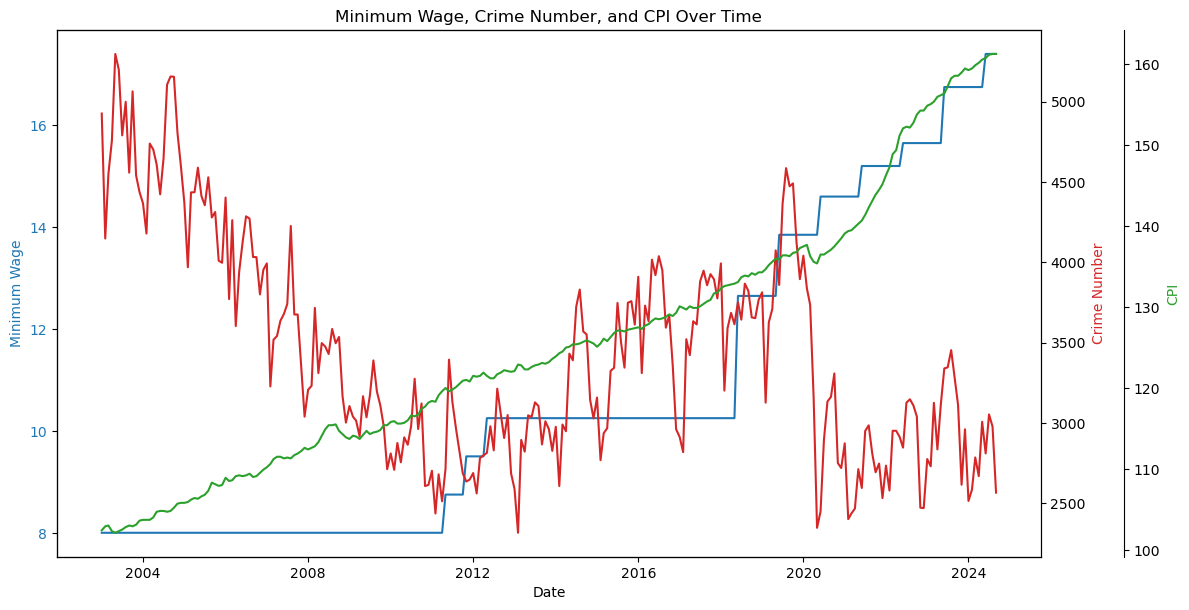

In [54]:
# Plotting the combined data
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Minimum Wage', color=color)
ax1.plot(monthly_df['date'], monthly_df['MinWage'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'

ax2.set_ylabel('Crime Number', color=color)
ax2.plot(monthly_df['date'], monthly_df['crime_number'], color=color)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('CPI', color=color)
ax3.plot(monthly_df['date'], monthly_df['CPI'], color=color)

fig.tight_layout()
plt.title('Minimum Wage, Crime Number, and CPI Over Time')
plt.show()


## Load temperature variable

In [55]:
temperature_data = pd.read_csv("./temperature.csv", header=None, names=["date", "temperature"])

temperature_data['date'] = pd.to_datetime(temperature_data['date'], format='%Y-%m-%d')

merged_df = pd.merge(monthly_df, temperature_data, how='left', on='date')

,date,MinWage,crime_number,CPI,temperature
0,2003-01-01,8.0,4926,102.4,7.2
1,2003-02-01,8.0,4148,102.9,5.5
2,2003-03-01,8.0,4550,103.0,7.9
3,2003-04-01,8.0,4759,102.3,9.6
4,2003-05-01,8.0,5297,102.1,15.0


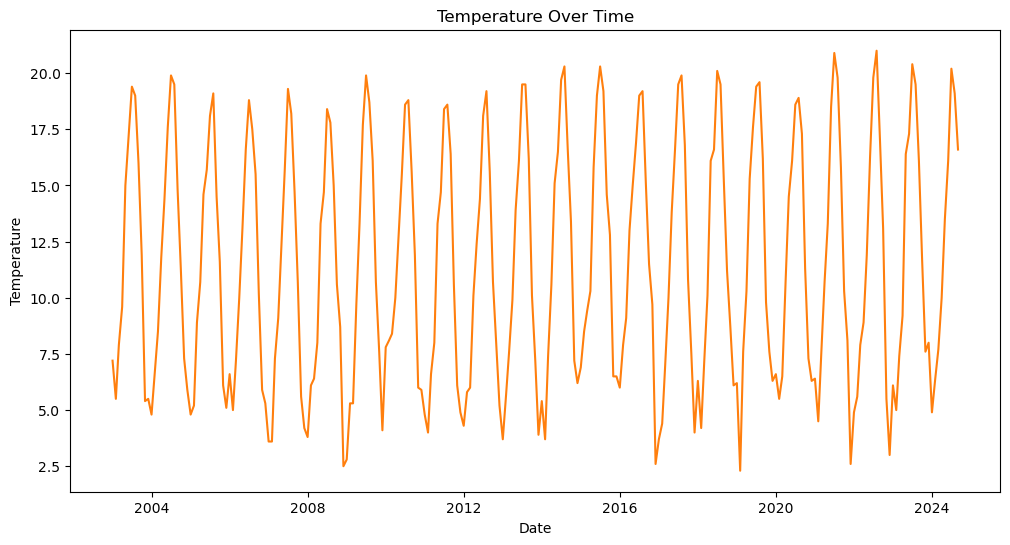

In [57]:
# plot the temperature data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['temperature'], color='tab:orange')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
